# Is park weather associated with visitor counts for 2022?

### Hypothesis

Null:  Weather and visitation are not correlated.

Alternate:  Parks with average summer temperatures between 70-80 degrees have more visitors.

In [1]:
#Dependencies
import pandas as pd
import json
import requests
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from configure import VC_API_key

In [2]:
# Pull visitor and park info from resources, especially looking for lat and long and at the weather column.

# Dan's code
from configure import NPS_API_key
from pathlib import Path
import re
from pandas import json_normalize 

park_visitors_csv_file = Path("../Resources/national_park_visitors.csv")

#Read the csv and create variable called park_visitors_data
park_visitors_data= pd.read_csv(park_visitors_csv_file)

#Make it into a dataframe
park_visitors_df = pd.DataFrame(park_visitors_data)

#Establish nps endpoint - with api key
endpoint = f"https://developer.nps.gov/api/v1/parks?limit=600&api_key={NPS_API_key}"

#turn the result into a json file
parks_data = requests.get(endpoint).json()

#Normalize data so it all fits into a dataframe
normalized_parks_data = json_normalize(parks_data, 'data')

#Drop the columns we dont need
all_parks_df = pd.DataFrame(normalized_parks_data).drop(columns=[
'id', 
    'url', 
    'directionsInfo', 
    'directionsUrl', 
    'addresses',
    'latLong',
    'images', 
    'contacts.phoneNumbers',
    'contacts.emailAddresses',
    
])

#sort by only those named national park or national park and preserve
national_parks_df = all_parks_df.loc[(all_parks_df['designation'] == "National Park") | (all_parks_df['designation'] == "National Park & Preserve")]

#Clean up the " NP" Part of the Park Name
park_visitors_df_NP_clean = park_visitors_df.replace(' NP','', regex=True)

#Clean up the "& PRES" Part of the Park Name
park_visitors_df_PRES_clean = park_visitors_df_NP_clean.replace(' & PRES','', regex=True)

#Make Park Name match for those that do not
park_visitors_df_clean = park_visitors_df_PRES_clean.replace('Hawaii Volcanoes','Hawaiʻi Volcanoes', regex=True)
park_visitors_df_clean = park_visitors_df_clean.replace('Haleakala','Haleakalā', regex=True)
park_visitors_df_clean = park_visitors_df_clean.replace('Black Canyon of the Gunnison','Black Canyon Of The Gunnison', regex=True)
park_visitors_df_clean = park_visitors_df_clean.replace('Wrangell-St. Elias','Wrangell - St Elias', regex=True)
park_visitors_df_clean = park_visitors_df_clean.replace('Gates of the Arctic','Gates Of The Arctic', regex=True)

#rename park_visitors_df columns
park_visitors_df_clean.columns = ["Park Name", "Rank", "Visitors", "Percent Of Total"]

#create a copy to start renaming columns
national_parks_df_clean = national_parks_df.copy()

#rename columns
national_parks_df_clean.rename(columns={
    'fullName':'Full Name',
    'parkCode':'Park Code',
    'description':'Description',
    'latitude':'Latitude',
    'longitude':'Longitude',
    'activities':'Activities',
    'topics':'Topics',
    'states':'States',
    'entranceFees':'Entrance Fees',
    'entrancePasses':'Entrance Passes',
    'fees':'Fees',
    'operatingHours':'Operating Hours',
    'weatherInfo':'Weather Info',
    'designation':'Designation',
    'name':'Park Name'
}, inplace = True)

#merge visitor df and park df
combined_park_data_df = park_visitors_df_clean.merge(national_parks_df_clean, on="Park Name", how='left')

print(len(combined_park_data_df))
combined_park_data_df

#end Dan's code (modified for weather)

63


,Park Name,Rank,Visitors,Percent Of Total,Full Name,Park Code,Description,Latitude,Longitude,Activities,Topics,States,Entrance Fees,Entrance Passes,Fees,Operating Hours,Weather Info,Designation
0,Great Smoky Mountains,1,"12,937,633",14.59%,Great Smoky Mountains National Park,grsm,Ridge upon ridge of forest straddles the borde...,35.60116374,-83.50818326,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[],"NC,TN",[],[],[],"[{'exceptions': [], 'description': 'Primary ro...",Elevations in the park range from approximatel...,National Park
1,Grand Canyon,2,"4,732,101",5.34%,Grand Canyon National Park,grca,"Grand Canyon National Park, in Northern Arizon...",36.0001165336,-112.121516363,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,AZ,"[{'cost': '35.00', 'description': 'Admits one ...","[{'cost': '70.00', 'description': 'Available t...",[],"[{'exceptions': [], 'description': 'Both Deser...",This weather varies with cold winters and mild...,National Park
2,Zion,3,"4,692,417",5.29%,Zion National Park,zion,Follow the paths where native people and pione...,37.29839254,-113.0265138,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,UT,"[{'cost': '35.00', 'description': 'Admits priv...",[],[],"[{'exceptions': [], 'description': 'Zion Natio...",Zion is known for a wide range of weather cond...,National Park
3,Rocky Mountain,4,"4,300,424",4.85%,Rocky Mountain National Park,romo,Rocky Mountain National Park's 415 square mile...,40.3556924,-105.6972879,[{'id': '5F723BAD-7359-48FC-98FA-631592256E35'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,CO,"[{'cost': '30.00', 'description': '1-Day Vehic...","[{'cost': '70.00', 'description': 'RMNP Park-s...",[],"[{'exceptions': [], 'description': 'While cert...","Weather can change quickly in RMNP, due to Roc...",National Park
4,Acadia,5,"3,970,260",4.48%,Acadia National Park,acad,Acadia National Park protects the natural beau...,44.409286,-68.247501,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,ME,"[{'cost': '6.00', 'description': 'Vehicle rese...","[{'cost': '70.00', 'description': 'The Acadia ...",[],"[{'exceptions': [], 'description': 'Acadia Nat...","Located on Mount Desert Island in Maine, Acadi...",National Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Isle Royale,59,"25,454",0.03%,Isle Royale National Park,isro,"Explore a rugged, isolated island far from our...",48.01145819,-88.82780657,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,MI,"[{'cost': '7.00', 'description': '$7 per perso...","[{'cost': '60.00', 'description': 'Isle Royale...",[],[{'exceptions': [{'exceptionHours': {'wednesda...,Isle Royale National Park is a remote island w...,National Park
59,Lake Clark,60,"18,187",0.02%,Lake Clark National Park & Preserve,lacl,Lake Clark National Park and Preserve is a lan...,60.57405857,-153.55535,[{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A27B'...,AK,[],[],[],"[{'exceptions': [], 'description': 'The park a...",Lake Clark has two distinct climate areas: the...,National Park & Preserve
60,Kobuk Valley,61,"16,925",0.02%,Kobuk Valley National Park,kova,"Caribou, sand dunes, the Kobuk River, Onion Po...",67.35631336,-159.2002293,[{'id': '071BA73C-1D3C-46D4-A53C-00D5602F7F0E'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A27B'...,AK,[],[],[],"[{'exceptions': [], 'description': 'The Northw...","Snow, rain, and freezing temperatures can occu...",National Park
61,Gates Of The Arctic,62,"9,457",0.01%,Gates Of The Arctic National Park & Preserve,gaar,This vast landscape does not contain any roads...,67.75961636,-153.2917758,[{'id': 'A59947B7-3376-49B4-AD02-C0423E08C5F7'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A27B'...,AK,[],[],[],"[{'exceptions': [], 'description': 'No closed ...",The climate of Gates of th

In [3]:
weather_prep_data = combined_park_data_df[["Park Name", "Rank", "Visitors", "Percent Of Total", "Full Name", "Latitude", "Longitude", "Weather Info"]]
weather_data_prepped = weather_prep_data.copy()
weather_data_prepped["Lat/Lon"] = weather_prep_data["Latitude"].str.cat(weather_prep_data["Longitude"], sep = ", ")
weather_data_prepped.head()

,Park Name,Rank,Visitors,Percent Of Total,Full Name,Latitude,Longitude,Weather Info,Lat/Lon
0,Great Smoky Mountains,1,"12,937,633",14.59%,Great Smoky Mountains National Park,35.60116374,-83.50818326,Elevations in the park range from approximatel...,"35.60116374, -83.50818326"
1,Grand Canyon,2,"4,732,101",5.34%,Grand Canyon National Park,36.0001165336,-112.121516363,This weather varies with cold winters and mild...,"36.0001165336, -112.121516363"
2,Zion,3,"4,692,417",5.29%,Zion National Park,37.29839254,-113.0265138,Zion is known for a wide range of weather cond...,"37.29839254, -113.0265138"
3,Rocky Mountain,4,"4,300,424",4.85%,Rocky Mountain National Park,40.3556924,-105.6972879,"Weather can change quickly in RMNP, due to Roc...","40.3556924, -105.6972879"
4,Acadia,5,"3,970,260",4.48%,Acadia National Park,44.409286,-68.247501,"Located on Mount Desert Island in Maine, Acadi...","44.409286, -68.247501"


In [4]:
# API to Visual Crossing for weather data from summer of 2022
import urllib.parse

# Create list of results for all dates for each location
results = []

dates = ["2022-05-01",
        "2022-05-15",
        "2022-05-29",
        "2022-06-12",
        "2022-06-26",
        "2022-07-10",
        "2022-07-24",
        "2022-08-07",
        "2022-08-21",
        "2022-09-04",
        "2022-09-18"]

# set up a parameters dictionary
params = {
    "unitGroup":"us",
    "elements":"datetime,name,tempmax,tempmin,precip,cloudcover",
    "include":"days,obs",
    "key":VC_API_key,
    "contentType":"json"    
}
for park, row in weather_data_prepped.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    for date in dates:
        # Set base URL
        # This url works:  url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/35.60116374%2C%20-83.50818326/2022-05-01/2022-05-01?unitGroup=us&elements=datetime%2Cname%2Ctempmax%2Ctempmin%2Cprecip%2Ccloudcover&include=days%2Cobs&key={VC_API_key}&contentType=json"
        base_url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{lat}%2C%20{lon}/{date}/{date}"
        query_string = urllib.parse.urlencode(params)  #from GPTChat
        
        # Build the URL using an f-string and get data
        url = f'{base_url}?{query_string}'
        # print(url)
        park_weather_data = requests.get(url).json()
        response = requests.get(url)
        if response.status_code == 200:
            park_weather_data = response.json()
            results.append(park_weather_data)
        else:
            print(f"Error: {response.status_code} - {response.text}")
        results.append(park_weather_data)


In [5]:
# Create a dataframe with all the weather data

# Initialize empty lists for storing tempmin, tempmax, precip, and cloudcover values
lat_lon_ls = []
date_ls = []
tempmin_ls = []
tempmax_ls = []
precip_ls = []
cloudcover_ls = []

# Parse JSON and add our 4 values to their respective lists
for json_data in results:
    days_data = json_data["days"]
    if days_data:
        #Add lat,lon for eventual merge with park data.
        weather_lat = json_data["latitude"]
        weather_lon = json_data["longitude"]
        weather_lat_lon = f"{weather_lat}, {weather_lon}"
        lat_lon_ls.append(weather_lat_lon)
        day = days_data[0]
        obs_date = day["datetime"]
        date_ls.append(obs_date)
        tempmax = day["tempmax"]
        tempmax_ls.append(tempmax)
        tempmin = day["tempmin"]
        tempmin_ls.append(tempmin)
        precip = day["precip"]
        precip_ls.append(precip)
        cloudcover = day["cloudcover"]
        cloudcover_ls.append(cloudcover)


In [6]:
# Create a DataFrame
weather_df = pd.DataFrame({
    "Lat/Lon" : lat_lon_ls,
    "Date": date_ls,
    "Temp Min": tempmin_ls,
    "Temp Max": tempmax_ls,
    "Precipitation": precip_ls,
    "Cloud Cover": cloudcover_ls
})

weather_df

,Lat/Lon,Date,Temp Min,Temp Max,Precipitation,Cloud Cover
0,"35.60116374, -83.50818326",2022-05-01,61.7,77.4,0.192,64.0
1,"35.60116374, -83.50818326",2022-05-01,61.7,77.4,0.192,64.0
2,"35.60116374, -83.50818326",2022-05-15,62.0,78.3,0.073,69.6
3,"35.60116374, -83.50818326",2022-05-15,62.0,78.3,0.073,69.6
4,"35.60116374, -83.50818326",2022-05-29,57.1,82.1,0.002,32.6
...,...,...,...,...,...,...
1381,"18.7932, 100.78",2022-08-21,73.4,80.6,1.737,94.8
1382,"18.7932, 100.78",2022-09-04,77.0,91.4,0.004,51.6
1383,"18.7932, 100.78",2022-09-04,77.0,91.4,0.004,51.6
1384,"18.7932, 100.78",2022-09-18,75.2,90.6,0.450,53.9


In [7]:
# Get average summer conditions for each park
avg_tempmin = weather_df.groupby("Lat/Lon") ["Temp Min"].mean()
avg_tempmax = weather_df.groupby("Lat/Lon") ["Temp Max"].mean()
avg_precip = weather_df.groupby("Lat/Lon") ["Precipitation"].mean()
avg_cloudcover = weather_df.groupby("Lat/Lon") ["Cloud Cover"].mean()

In [8]:
# Create a df with the park averages
park_avgs = pd.DataFrame([avg_tempmin, avg_tempmax, avg_precip, avg_cloudcover])
park_avgs = park_avgs.transpose()

In [10]:
# Merge park_avgs dataframe with weather_data on lat,lon and show
final_weather_data = weather_data_prepped.merge(park_avgs, how = "left", on = "Lat/Lon")
final_weather_data

,Park Name,Rank,Visitors,Percent Of Total,Full Name,Latitude,Longitude,Weather Info,Lat/Lon,Temp Min,Temp Max,Precipitation,Cloud Cover
0,Great Smoky Mountains,1,"12,937,633",14.59%,Great Smoky Mountains National Park,35.60116374,-83.50818326,Elevations in the park range from approximatel...,"35.60116374, -83.50818326",64.709091,82.100000,0.111182,59.481818
1,Grand Canyon,2,"4,732,101",5.34%,Grand Canyon National Park,36.0001165336,-112.121516363,This weather varies with cold winters and mild...,"36.0001165336, -112.121516363",44.445455,80.472727,0.010364,13.636364
2,Zion,3,"4,692,417",5.29%,Zion National Park,37.29839254,-113.0265138,Zion is known for a wide range of weather cond...,"37.29839254, -113.0265138",59.918182,88.745455,0.001000,6.009091
3,Rocky Mountain,4,"4,300,424",4.85%,Rocky Mountain National Park,40.3556924,-105.6972879,"Weather can change quickly in RMNP, due to Roc...","40.3556924, -105.6972879",51.363636,73.990909,0.075818,22.218182
4,Acadia,5,"3,970,260",4.48%,Acadia National Park,44.409286,-68.247501,"Located on Mount Desert Island in Maine, Acadi...","44.409286, -68.247501",55.600000,71.109091,0.013000,33.145455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Isle Royale,59,"25,454",0.03%,Isle Royale National Park,48.01145819,-88.82780657,Isle Royale National Park is a remote island w...,"48.01145819, -88.82780657",48.563636,57.836364,0.141727,91.120000
59,Lake Clark,60,"18,187",0.02%,Lake Clark National Park & Preserve,60.57405857,-153.55535,Lake Clark has two distinct climate areas: the...,"60.57405857, -153.55535",40.600000,64.236364,NaN,81.185714
60,Kobuk Valley,61,"16,925",0.02%,Kobuk Valley National Park,67.35631336,-159.2002293,"Snow, rain, and freezing temperatures can occu...","67.35631336, -159.2002293",41.454545,56.836364,0.046636,54.672727
61,Gates Of The Arctic,62,"9,457",0.01%,Gates Of The Arctic National Park & Preserve,67.75961636,-153.2917758,The climate of Gates of the Arctic National Pa...,"67.75961636, -153.2917758",36.718182,50.909091,0.014727,69.990909


In [11]:
# Drop parks with missing temp data
# At lat/Lon:  
# 42.94065854, -122.1338414 = Crater Lake
# 61.4182147, -142.6028439 = Wrangell - St Elias
# And our known missing parks:  Sequoia, Kings Canyon, Redwood, and National Park of American Samoa

weather_minus_zeros = final_weather_data[final_weather_data["Temp Max"]!=0]
clean_weather_data = weather_minus_zeros.dropna(subset=['Temp Max'])
clean_weather_data.info()  #checking data type for visitors and how many NaN values are in Preciptation and Cloud Cover.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 61
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Park Name         57 non-null     object 
 1   Rank              57 non-null     int64  
 2   Visitors          57 non-null     object 
 3   Percent Of Total  57 non-null     object 
 4   Full Name         57 non-null     object 
 5   Latitude          57 non-null     object 
 6   Longitude         57 non-null     object 
 7   Weather Info      57 non-null     object 
 8   Lat/Lon           57 non-null     object 
 9   Temp Min          57 non-null     float64
 10  Temp Max          57 non-null     float64
 11  Precipitation     51 non-null     float64
 12  Cloud Cover       54 non-null     float64
dtypes: float64(4), int64(1), object(8)
memory usage: 6.2+ KB


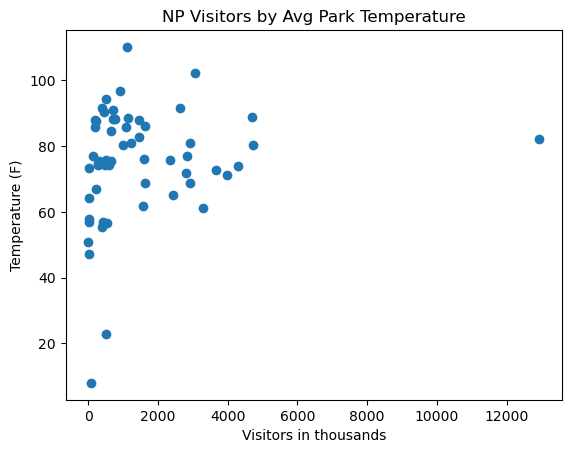

In [12]:
# Scatterplot number of visitors vs avg temp max, pearson's r if it looks linear

visitors_by_thousand = clean_weather_data.copy()
visitors_by_thousand["Visitors"] = visitors_by_thousand["Visitors"].str.replace(",", "").astype(int)
visitors_by_thousand["Visitors (k)"] = visitors_by_thousand["Visitors"] / 1000
plt.scatter(visitors_by_thousand["Visitors (k)"], visitors_by_thousand["Temp Max"])
plt.title("NP Visitors by Avg Park Temperature")
plt.xlabel("Visitors in thousands")
plt.ylabel("Temperature (F)")
plt.show()

The correlation coefficient between number of visitors and average maximum temperature is 0.17.


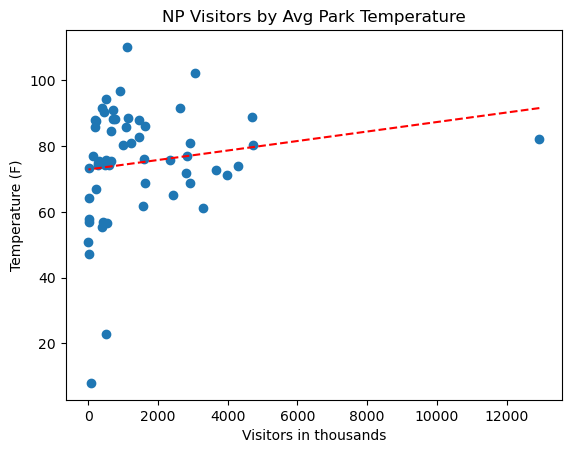

In [30]:
#Linear regression between Avg Max Temp and Num of Visitors by Park

# Calculate the correlation coefficient
visitors = visitors_by_thousand["Visitors (k)"]
max_temp = visitors_by_thousand["Temp Max"]
print(f"The correlation coefficient between number of visitors and average maximum temperature is {round(st.pearsonr(visitors,max_temp)[0],2)}.")

pe_slope, pe_int, pe_r, pe_p, pe_std_err  = st.linregress(visitors, max_temp)
pe_fit = pe_slope * visitors + pe_int

plt.scatter(visitors_by_thousand["Visitors (k)"], visitors_by_thousand["Temp Max"])
plt.plot(visitors,pe_fit,"--",color="r")
plt.title("NP Visitors by Avg Park Temperature")
plt.xlabel("Visitors in thousands")
plt.ylabel("Temperature (F)")

plt.savefig("Images/Avg_Temp_Scatter.png") #dpi:  Higher number increases quality of picture AND size of file.  100 is default, 200 is double. Transparent applies to whether the background is clear or white.
plt.show()

In [15]:
#Linear regression between Avg Min Temp and Num of Visitors by Park

# Calculate the correlation coefficient
visitors = visitors_by_thousand["Visitors (k)"]
min_temp = visitors_by_thousand["Temp Min"]
print(f"The correlation coefficient between number of visitors and average minimum temperature is {round(st.pearsonr(visitors,min_temp)[0],2)}.")

The correlation coefficient between number of visitors and average minimum temperature is 0.11.


In [16]:
#Linear regression between Avg Precipitation and Num of Visitors by Park

# Calculate the correlation coefficient
precip_df = visitors_by_thousand.dropna(subset = ["Precipitation"])
visitors = precip_df["Visitors (k)"]
precip = precip_df["Precipitation"]
print(f"The correlation coefficient between number of visitors and average precipitation is {round(st.pearsonr(visitors,precip)[0],2)}.")

The correlation coefficient between number of visitors and average precipitation is -0.05.


In [17]:
#Linear regression between Avg Cloud Cover and Num of Visitors by Park

# Calculate the correlation coefficient
cloudcover_df = visitors_by_thousand.dropna(subset = ["Cloud Cover"])
visitors = cloudcover_df["Visitors (k)"]
cloudcover = cloudcover_df["Cloud Cover"]
print(f"The correlation coefficient between number of visitors and average cloud cover is {round(st.pearsonr(visitors,cloudcover)[0],2)}.")

The correlation coefficient between number of visitors and average cloud cover is -0.11.


In [18]:
# Put parks in bins by avg maxtemp ranges
park_bins = clean_weather_data.copy()
park_bins["Visitors"] = park_bins["Visitors"].str.replace(",", "").astype(int)
park_bins["Visitors (k)"] = park_bins["Visitors"] / 1000
bins = [0, 60, 70, 80, 90, 100]
labels = ['<60 degrees', '60-70 degrees', '70-80 degrees', '80-90 degrees', '90-100 degrees']
park_bins['Avg Temp Range'] = pd.cut(x = park_bins['Temp Max'], bins = bins, labels = labels, include_lowest = True)
park_bins.head()

,Park Name,Rank,Visitors,Percent Of Total,Full Name,Latitude,Longitude,Weather Info,Lat/Lon,Temp Min,Temp Max,Precipitation,Cloud Cover,Visitors (k),Avg Temp Range
0,Great Smoky Mountains,1,12937633,14.59%,Great Smoky Mountains National Park,35.60116374,-83.50818326,Elevations in the park range from approximatel...,"35.60116374, -83.50818326",64.709091,82.100000,0.111182,59.481818,12937.633,80-90 degrees
1,Grand Canyon,2,4732101,5.34%,Grand Canyon National Park,36.0001165336,-112.121516363,This weather varies with cold winters and mild...,"36.0001165336, -112.121516363",44.445455,80.472727,0.010364,13.636364,4732.101,80-90 degrees
2,Zion,3,4692417,5.29%,Zion National Park,37.29839254,-113.0265138,Zion is known for a wide range of weather cond...,"37.29839254, -113.0265138",59.918182,88.745455,0.001000,6.009091,4692.417,80-90 degrees
3,Rocky Mountain,4,4300424,4.85%,Rocky Mountain National Park,40.3556924,-105.6972879,"Weather can change quickly in RMNP, due to Roc...","40.3556924, -105.6972879",51.363636,73.990909,0.075818,22.218182,4300.424,70-80 degrees
4,Acadia,5,3970260,4.48%,Acadia National Park,44.409286,-68.247501,"Located on Mount Desert Island in Maine, Acadi...","44.409286, -68.247501",55.600000,71.109091,0.013000,33.145455,3970.260,70-80 degrees


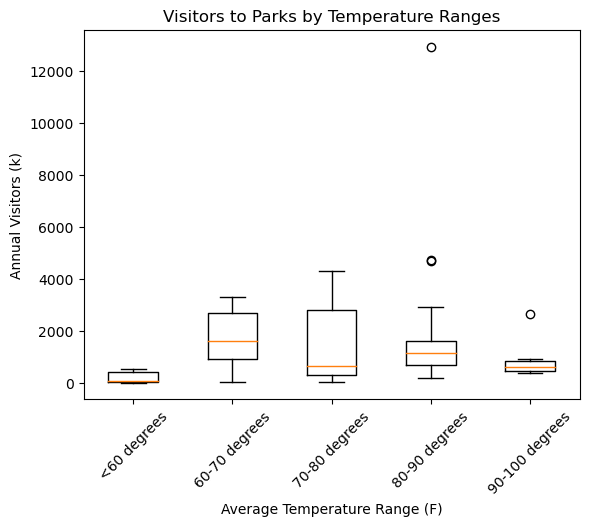

In [29]:
# Are more high visitor parks in any bin?
# Create a box plot with temperature range bins.

temp_ranges = ['<60 degrees', '60-70 degrees', '70-80 degrees', '80-90 degrees', '90-100 degrees']

# Create empty list to fill with grouped visitor data
visitors_by_range = []

# Create list of visitors for each temperature range.
for temp in temp_ranges: 
    range_group = park_bins.loc[park_bins["Avg Temp Range"] == temp, "Visitors (k)"]
    visitors_by_range.append(range_group)
    quartiles = range_group.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
plt.boxplot(visitors_by_range, labels = temp_ranges)
plt.xticks(rotation = 45)
plt.title("Visitors to Parks by Temperature Ranges")
plt.xlabel("Average Temperature Range (F)")
plt.ylabel("Annual Visitors (k)")

plt.savefig("Images/Temperature_Range_Box_Plot.png", bbox_inches='tight') #dpi:  Higher number increases quality of picture AND size of file.  100 is default, 200 is double. Transparent applies to whether the background is clear or white.
plt.show()

In [21]:
# Statistical Testing
# GPTChat suggested that the best statistical test for numerical data in 5 categories is the Kruskal-Wallis test rather than any we learned in class.
# The next code is how ChatGPT recommended splitting visitors_by_range (the list of series of visitors by temperature range bins) into 5 separate lists to use for the test.

import string

series_list = visitors_by_range

group_dict = {}
groups = string.ascii_uppercase[:len(series_list)]  # A, B, C, D, E

for group, series in zip(groups, series_list):   
    group_dict[group] = series.tolist()

group_A = group_dict['A']
group_B = group_dict['B']
group_C = group_dict['C']
group_D = group_dict['D']
group_E = group_dict['E']

# Perform Kruskal-Wallis test
statistic, p_value = st.kruskal(group_A, group_B, group_C, group_D, group_E)
print(p_value)

0.011273369021595717
